In [2]:
!python3 -m venv .venv

In [3]:
!source .venv/bin/activate

In [4]:
!pip3 install pygsheets pandas pandasql numpy us matplotlib forex-python imapclient

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached IMAPClient-2.3.1-py2.py3-none-any.whl (181 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [5]:
!pip3 freeze > requirements.txt

In [104]:
#library 
import sys
import os
import re
import time
import random
import datetime
import pygsheets
import numpy as np
import pandas as pd
from pandasql import *
from datetime import date
from pandasql import sqldf
import us.states as states
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates



# from oauth2client.service_account import ServiceAccountCredentials
gc = pygsheets.authorize(service_file='/Users/jovanaotasevic/Documents/python-test1-347611-c756a5634c90.json')


#conncection to G drive
gauth = GoogleAuth()
# Try to load saved client credentials
gauth.LoadCredentialsFile("./mycreds.txt")
if gauth.credentials is None:
    # Authenticate if they're not there
    gauth.LocalWebserverAuth()
elif gauth.access_token_expired:
# Refresh them if expired
    gauth.Refresh()
else:
    # Initialize the saved creds
    gauth.Authorize()
# Save the current credentials to a file
gauth.SaveCredentialsFile("./mycreds.txt")
gauth = GoogleAuth()
# gauth.DEFAULT_SETTINGS['client_config_file'] = "client_secret.json"
gauth.LoadCredentialsFile("./mycreds.txt")
drive = GoogleDrive(gauth)
# print(drive)
# print("DONE")
    
#email sending
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email.utils import COMMASPACE
from email import encoders

#email reading
import imaplib
import email

In [102]:
#needed for env variable and functions
from pathlib import Path
from dotenv import load_dotenv

directory = os.getcwd()
substring ='jovanaotasevic'
if substring in directory:
    #print("mac!")
    env_path_name = '/Users/jovanaotasevic/0. a_set_up'
    sys_path_name = '/Users/jovanaotasevic/0. a_set_up'
else:
    #print('server')
    env_path_name  = '/home/jovana/Jovana/BI_live_scripts/set_up'
    sys_path_name  = '/home/jovana/Jovana/BI_live_scripts/set_up'

In [103]:
#functions
sys.path.insert(0,sys_path_name)

from f_pygsheets import pygsheets_file
#using functions
gc = pygsheets_file()

In [97]:
#env. variables
env_path = Path(env_path_name, '.env')
load_dotenv(dotenv_path=env_path)
FINAL_PROJECT_DS_KEY = os.getenv("FINAL_PROJECT_DS_KEY")
email_from = os.getenv("EMAIL_FROM")
email_password = os.getenv("EMAIL_PASSWORD")
LOCAL_FOLDER = os.getenv("LOCAL_FOLDER")



In [15]:
#file import
try:
    url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/bachelorette/bachelorette.csv'
    df_og = pd.read_csv(url)
    print("Succesfully imported")  
except Exception as e:
    print(e)
    

Succesfully imported


In [16]:
#getting info about columns
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SHOW            921 non-null    object
 1   SEASON          921 non-null    object
 2   CONTESTANT      921 non-null    object
 3   ELIMINATION-1   393 non-null    object
 4   ELIMINATION-2   237 non-null    object
 5   ELIMINATION-3   206 non-null    object
 6   ELIMINATION-4   177 non-null    object
 7   ELIMINATION-5   142 non-null    object
 8   ELIMINATION-6   131 non-null    object
 9   ELIMINATION-7   105 non-null    object
 10  ELIMINATION-8   65 non-null     object
 11  ELIMINATION-9   51 non-null     object
 12  ELIMINATION-10  64 non-null     object
 13  DATES-1         54 non-null     object
 14  DATES-2         527 non-null    object
 15  DATES-3         420 non-null    object
 16  DATES-4         349 non-null    object
 17  DATES-5         287 non-null    object
 18  DATES-6   

In [17]:
#creating a copy of dataframe
df = df_og.copy()

In [18]:
#looking at how many season there are
df['SEASON'].unique()

array(['SEASON', '13', '12', '11', '10', '09', '08', '07', '06', '05',
       '04', '03', '02', '01', '21', '20', '19', '18', '17', '16', '15',
       '14'], dtype=object)

In [19]:
df[df['SEASON'] == 'SEASON']

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
32,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
59,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
86,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
112,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
138,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
164,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
190,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
216,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
247,Bachelorette,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10


In [20]:
#cleaning data
df = df[df['SEASON'] != 'SEASON']
df['SEASON'] = df['SEASON'].str.lstrip('0').astype(int)

In [21]:
print(len(df), " len of df")
print(len(df[df.isnull().values.any(axis=1)]), " len of rows which have null values.")

887  len of df
887  len of rows which have null values.


In [22]:
#drop row if all values are null
df.dropna(axis = 0, how = 'all', inplace = True)

In [23]:
print(len(df), " len of df after cleaning")

887  len of df after cleaning


In [24]:
#checking if all values in elimation columns are as predefined
print(pd.unique(df[['ELIMINATION-1', 'ELIMINATION-2','ELIMINATION-3','ELIMINATION-4',
             'ELIMINATION-5', 'ELIMINATION-6','ELIMINATION-7','ELIMINATION-8',
            'ELIMINATION-9','ELIMINATION-10']].values.ravel('C')))

['R1' nan 'R' 'W' 'E' 'ED' 'EU' 'EQ' 'EF']


In [25]:
#checking if all values in dates columns are as predefined
print(pd.unique(df[['DATES-1', 'DATES-2','DATES-3','DATES-4',
             'DATES-5', 'DATES-6','DATES-7','DATES-8',
            'DATES-9','DATES-10']].values.ravel('C')))

[nan 'D6' 'D13' 'D1' 'D7' 'D9' 'D10' 'D8' 'D3' 'D2' 'D12' 'D11' 'D5' 'D14'
 'D4' 'D15' 'D6, D12' 'D1, D12']


In [27]:
#adding dummy data - season start

#getting a season list
season_list = df['SEASON'].unique()

# Create a list of 21 dates starting from today
dates = [datetime.date.today() - datetime.timedelta(days=x) for x in range(21)]

# Create a Pandas DataFrame from the list of dates
df_dates = pd.DataFrame({'Date_START': dates})
df_dates.sort_values(by='Date_START', ascending=True,inplace=True)
df_dates.reset_index(drop=True, inplace=True)

df_dates['SEASON'] = range(1, len(df_dates)+1)
df_dates['SEASON'] = df_dates['SEASON'].astype(str)

#merging dataframes
df['SEASON'] = df['SEASON'].astype(str)
df = df.merge(df_dates, on="SEASON", how='left')

In [28]:
#getting day and month out of date_start
df['Date_START'] = pd.to_datetime(df['Date_START'])
df['Day_Name'] = df['Date_START'].dt.strftime('%A')
df['Month_Number'] = df['Date_START'].dt.month

In [29]:
#how long has it been since the start
today = date.today()
today_timestamp = pd.Timestamp(today)
df['Days_Since_Today'] = (today_timestamp - df['Date_START']).dt.days

In [30]:
# Define the start and end dates for birthday colums - DUMMY DATA
start_date = datetime.date(1990, 1, 1)
end_date = datetime.date(1999, 12, 31)

#function for random dates 
def random_date(start, end):
    return start + datetime.timedelta(days=random.randint(0, (end - start).days))

# Apply the function to df
df['birthday'] = df.apply(lambda row: random_date(start_date, end_date), axis=1)

#clean birthday column and get the age
df['birthday'] = pd.to_datetime(df['birthday'])
df['AGE'] = (today_timestamp - df['birthday']).dt.days
df['AGE'] =round((df['AGE']/365),0)
df['AGE'] = df['AGE'].astype(int)

In [31]:
#dummy data currency
start_value = 300
end_value = 30000

random_numbers = np.random.randint(start_value, end_value+1, size=len(df))
df['cost_usd'] = random_numbers

#format as usd
df['Currency_usd'] = df['cost_usd'].map('${:,}'.format)

#currency
c = CurrencyRates()
exchange_rate = c.get_rate('EUR', 'USD')
df['cost_eur'] = df['cost_usd'] * exchange_rate

In [32]:
#dummy data country
# Get a list of all US states
state_list = [state.name for state in states.STATES]
df["state"] = np.random.choice(state_list, size=len(df))

us_state_to_abbrev = {
"Alabama": "AL",
"Alaska": "AK",
"Arizona": "AZ",
"Arkansas": "AR",
"California": "CA",
"Colorado": "CO",
"Connecticut": "CT",
"Delaware": "DE",
"Florida": "FL",
"Georgia": "GA",
"Hawaii": "HI",
"Idaho": "ID",
"Illinois": "IL",
"Indiana": "IN",
"Iowa": "IA",
"Kansas": "KS",
"Kentucky": "KY",
"Louisiana": "LA",
"Maine": "ME",
"Maryland": "MD",
"Massachusetts": "MA",
"Michigan": "MI",
"Minnesota": "MN",
"Mississippi": "MS",
"Missouri": "MO",
"Montana": "MT",
"Nebraska": "NE",
"Nevada": "NV",
"New Hampshire": "NH",
"New Jersey": "NJ",
"New Mexico": "NM",
"New York": "NY",
"North Carolina": "NC",
"North Dakota": "ND",
"Ohio": "OH",
"Oklahoma": "OK",
"Oregon": "OR",
"Pennsylvania": "PA",
"Rhode Island": "RI",
"South Carolina": "SC",
"South Dakota": "SD",
"Tennessee": "TN",
"Texas": "TX",
"Utah": "UT",
"Vermont": "VT",
"Virginia": "VA",
"Washington": "WA",
"West Virginia": "WV",
"Wisconsin": "WI",
"Wyoming": "WY",
"District of Columbia": "DC",
"American Samoa": "AS",
"Guam": "GU",
"Northern Mariana Islands": "MP",
"Puerto Rico": "PR",
"United States Minor Outlying Islands": "UM",
"U.S. Virgin Islands": "VI",
}

states_df = pd.DataFrame.from_dict(us_state_to_abbrev, orient='index', columns=['abbrev'])
states_df.index.name = 'state'
states_df.reset_index(inplace=True)

df = df.merge(states_df, how='left', on='state')

In [33]:
#filter
max_month = df['Month_Number'].max()
query1_df = sqldf(f"SELECT * FROM df where Month_Number = {max_month};")

#group by
query2_df = sqldf(f"SELECT SHOW,Month_Number as MONTH, COUNT(CONTESTANT) AS NO_CONTESTANTS  FROM df GROUP BY SHOW,Month_Number;")



In [34]:
query2_df

,SHOW,MONTH,NO_CONTESTANTS
0,Bachelor,3,99
1,Bachelor,4,450
2,Bachelorette,3,100
3,Bachelorette,4,238


In [96]:
#sheet opening
sh = gc.open_by_key(FINAL_PROJECT_DS_KEY)
worksheet = sh.worksheet('title','data')
worksheet_looker = sh.worksheet('title','data_looker')

#add data to the sheet
worksheet.set_dataframe(df, start='A1')
worksheet_looker.set_dataframe(df, start='A1')

In [36]:
#get number of rows
def write_df_to_sheet(pos): 
    additional_rows_list = re.findall(r'\d+', pos)
    additional_rows = int(additional_rows_list[0])
    num_rows = worksheet.rows
    
    if num_rows > additional_rows:
        pass
    else:
        add_new_row = additional_rows - num_rows + 1
        worksheet.add_rows(add_new_row)
        
    cell = worksheet.get_value(pos)
    if cell == "":
        worksheet.add_rows(additional_rows)
        return worksheet.set_dataframe(df, start=pos)
    return "Cell is not empty, please choose another position."

In [24]:
#writting at random cells
write_df_to_sheet('a1000')
write_df_to_sheet('b2000')
write_df_to_sheet('c3000')
write_df_to_sheet('c4000')

'Cell is not empty, please choose another position.'

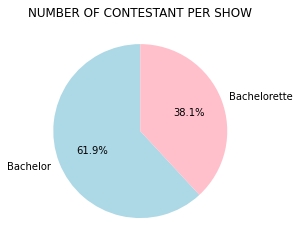

In [62]:
#GRAPHS
#PIE CHART
counts = df['SHOW'].value_counts()
contestants_per_show = pd.DataFrame(counts)
contestants_per_show.rename(columns={"SHOW": "NoContestants"})
colors = ['lightblue', 'pink']
plt.pie(counts.values, labels=counts.index, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title('NUMBER OF CONTESTANT PER SHOW')
# download graph
plt.savefig('no_contstants_per_show.png')
plt.show()

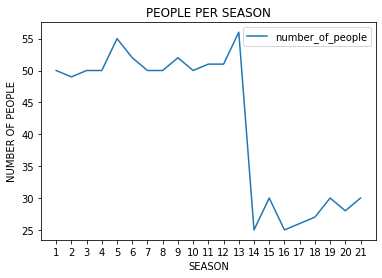

In [68]:
#LINE CHART 1
counts_people = df['SEASON'].value_counts()
df_line_chart_1 = counts_people.to_frame(name='number_of_people')
df_line_chart_1 = df_line_chart_1.reset_index()
df_line_chart_1.rename(columns={'index':'season'}, inplace=True)
df_line_chart_1['season'] = df_line_chart_1['season'].astype(int) 
df_line_chart_1.sort_values(by='season', ascending=True, inplace=True)

# Create a line chart from the DataFrame
df_line_chart_1.plot(x='season', y='number_of_people')

# Add a title and labels for the x and y axes
plt.title('PEOPLE PER SEASON')
plt.xlabel('SEASON')
plt.ylabel('NUMBER OF PEOPLE')

plt.xticks(df_line_chart_1['season'])
plt.savefig("no_people_per_season_line_chart.png")
# Show the chart
plt.show()

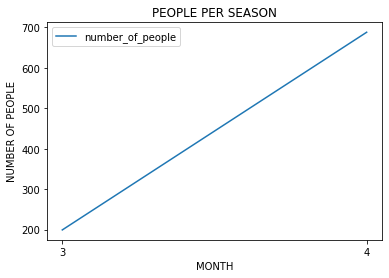

In [69]:
#LINE CHART 2
counts_people_per_month = df['Month_Number'].value_counts()
df_line_chart_2 = counts_people_per_month.to_frame(name='number_of_people')
df_line_chart_2 = df_line_chart_2.reset_index()
df_line_chart_2.rename(columns={'index':'MONTH'}, inplace=True)
df_line_chart_2['MONTH'] = df_line_chart_2['MONTH'].astype(int)

# Create a line chart from the DataFrame
df_line_chart_2.plot(x='MONTH', y='number_of_people')

# Add a title and labels for the x and y axes
plt.title('PEOPLE PER SEASON')
plt.xlabel('MONTH')
plt.ylabel('NUMBER OF PEOPLE')

plt.xticks(df_line_chart_2['MONTH'])
plt.savefig("no_people_per_month_line_chart.png")
# Show the chart
plt.show()

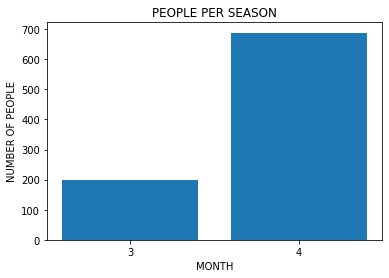

In [70]:
#BAR CHART

# Create a line chart from the DataFrame
# df_line_chart_2.plot(x='MONTH', y='number_of_people')
plt.bar(df_line_chart_2['MONTH'], df_line_chart_2['number_of_people'])

# Add a title and labels for the x and y axes
plt.title('PEOPLE PER SEASON')
plt.xlabel('MONTH')
plt.ylabel('NUMBER OF PEOPLE')

plt.xticks(df_line_chart_2['MONTH'])
plt.savefig("no_people_per_season_bar_chart.png")
# Show the chart
plt.show()

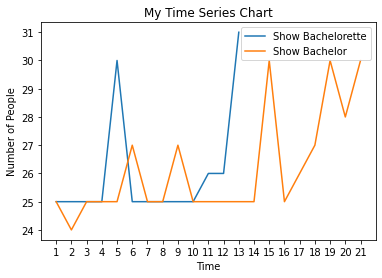

In [71]:
df_time = df.pivot_table(values='CONTESTANT', index='SEASON', columns = "SHOW", aggfunc='count').reset_index()
df_time['SEASON'] = df_time['SEASON'].astype(int)
df_time.sort_values(by='SEASON', ascending=True, inplace=True)
plt.plot(df_time["SEASON"], df_time['Bachelorette'], label='Show Bachelorette')
plt.plot(df_time["SEASON"], df_time['Bachelor'], label='Show Bachelor')
# Add a title and labels for the x and y axes
plt.title('My Time Series Chart')
plt.xlabel('Time')
plt.ylabel('Number of People')

# Add a legend
plt.legend()
plt.xticks(df_time['SEASON'])
plt.savefig("no_people_per_season_time_series.png")
# Show the chart
plt.show()


In [78]:
def send_emails(email_list, attachment_paths):

    # Email configuration
    email_from = email_from
    smtp_server = "smtp.gmail.com"
    smtp_port = 587
    email_password = email_password
    subject = "Test Email with attachment"

    # Connect with the server
    print("Connecting to server...")
    TIE_server = smtplib.SMTP(smtp_server, smtp_port)
    TIE_server.starttls()
    TIE_server.login(email_from, email_password)
    print("Succesfully connected to server")
    print()

    for person in email_list:

        # Make the body of the email
        body = """
        The analysis examines four charts related to the Bachelor/Bachelorette show. \n
        The first chart shows the division of contestants between the two shows, with the Bachelor having more contestants due to having more seasons than Bachelorette. Specifically, the Bachelor has had 21 seasons while Bachelorette has had 13.\n 
        The second graph displays the number of participants per month in both shows. The graph indicates that most seasons commence in April, and therefore, it is natural that more contestants participate in that month.\n
        The third graph illustrates the number of participants per season, showing a considerable drop after season 13. \n
        This decline is due to the cancellation of the Bachelorette show, as seen in the next graph, which shows no data after season 13. Finally, the fourth graph is a line graph representing the second graph, which requires further data to be more useful. \n
        Overall, the charts provide insights into the number of contestants participating in both shows, the trends in their participation, and the impact of cancellations on the show. However, the analysis could benefit from including additional information on how the show has evolved over time, the demographics of the contestants, and audience viewership trends.
        """

        # Create a multipart message to combine text and attachments
        message = MIMEMultipart()
        message['From'] = email_from
        message['To'] = COMMASPACE.join([person])
        message['Subject'] = subject

        # Attach the body of the message

        table_style = '<style>table, th, td {border: 1px solid black; border-collapse: collapse; padding: 10px;} table {margin-bottom: 20px;}</style>'
        table_spacing = '<td></td>'
        html_table1 = table_spacing + table_style + contestants_per_show.to_html()
        html_table2 = table_spacing + table_style + df_line_chart_1.to_html()
        html_table3 = table_spacing + table_style + df_line_chart_2.to_html()
        html_table4 = table_spacing + table_style + df_time.to_html()


        message.attach(MIMEText(html_table1, "html"))
        message.attach(MIMEText(html_table2, "html"))
        message.attach(MIMEText(html_table3, "html"))
        message.attach(MIMEText(html_table4, "html"))

        # Attach the files
        for attachment_path in attachment_paths:
            filename = os.path.basename(attachment_path)

            with open(attachment_path, 'rb') as attachment:
                part = MIMEBase('application', 'octet-stream')
                part.set_payload(attachment.read())
                encoders.encode_base64(part)
                part.add_header('Content-Disposition', f"attachment; filename= {filename}")
                message.attach(part)


        # Cast as string
        text = message.as_string()

        # Send emails to "person" as list is iterated
        print(f"Sending email to: {person}...")
        TIE_server.sendmail(email_from, person, text)
        print(f"Email sent to: {person}")
        print()

    # Close the port
    TIE_server.quit()

In [79]:
email_list = ["andrea.jolicic6@gmail.com", "jolicic.andrea8@gmail.com"]
attachment_paths = ["../Data Science Course/no_contstants_per_show.png", "../Data Science Course/no_people_per_season_bar_chart.png",
                   "../Data Science Course/no_people_per_season_line_chart.png", "../Data Science Course/no_people_per_season_time_series.png",
                   "../Data Science Course/no_people_per_month_line_chart.png"]


In [80]:
send_emails(email_list, attachment_paths)

Connecting to server...
Succesfully connected to server

Sending email to: andrea.jolicic6@gmail.com...
Email sent to: andrea.jolicic6@gmail.com

Sending email to: jolicic.andrea8@gmail.com...
Email sent to: jolicic.andrea8@gmail.com



In [86]:
#UBACITI DIO ZA UZIMANJE FAJLOVA

IMAP_SERVER = 'imap.gmail.com'
IMAP_PORT = 993
IMAP_USERNAME = email_from
IMAP_PASSWORD = email_password

# Local folder details
LOCAL_FOLDER = LOCAL_FOLDER

In [87]:
def read_email():
    '''
    Connects to an IMAP server and retrieves the last received email, saving any attachments to a local folder.
    '''
    
    # Connect to the IMAP server
    try:
        imap = imaplib.IMAP4_SSL(IMAP_SERVER, IMAP_PORT)
        imap.login(IMAP_USERNAME, IMAP_PASSWORD)
    except Exception as e:
        print(f"Failed to connect to the IMAP server: {e}")
        exit()

    # Select the INBOX mailbox
    mailbox = 'INBOX'
    try:
        imap.select(mailbox)
    except Exception as e:
        print(f"Failed to select the mailbox '{mailbox}': {e}")
        imap.logout()
        exit()

    # Search for the last received email
    try:
        result, data = imap.search(None, 'ALL')
        latest_email_id = data[0].split()[-1]
    except Exception as e:
        print(f"Failed to search for emails: {e}")
        imap.logout()
        exit()

    # Retrieve the last received email
    try:
        typ, msg_data = imap.fetch(latest_email_id, '(RFC822)')
        msg = email.message_from_bytes(msg_data[0][1])
    except Exception as e:
        print(f"Failed to retrieve email {latest_email_id}: {e}")
        imap.logout()
        exit()

    # Create the local folder if it doesn't already exist
    if not os.path.exists(LOCAL_FOLDER):
        try:
            os.makedirs(LOCAL_FOLDER)
        except Exception as e:
            print(f"Failed to create local folder '{LOCAL_FOLDER}': {e}")
            imap.logout()
            exit()

    # Iterate through the parts of the message
    for part in msg.walk():
        if part.get_content_disposition() is not None:
            # This part contains an attachment
            filename = part.get_filename()

            # Save the attachment to the local folder
            if filename:
                filepath = os.path.join(LOCAL_FOLDER, filename)

                try:
                    # Check if the file already exists
                    if os.path.exists(filepath):
                        raise Exception(f"File '{filepath}' already exists in the local folder.")

                    # Save the attachment to the local folder
                    with open(filepath, 'wb') as f:
                        f.write(part.get_payload(decode=True))
                except Exception as e:
                    print(f"Failed to save attachment '{filename}': {e}")

    # Logout from the IMAP server
    try:
        imap.logout()
    except Exception as e:
        print(f"Failed to logout from the IMAP server: {e}")

In [89]:
read_email()

In [85]:
# Upload files

folder = '16mRXllTNOWJDV_WjpuIEeI5cWqV-vW6B'

directory = LOCAL_FOLDER
for f in os.listdir(directory):
    filename = os.path.join(directory, f)
    gfile = drive.CreateFile({'parents' : [{'id' : folder}], 'title' : f})
    gfile.SetContentFile(filename)
    gfile.Upload()